<a href="https://colab.research.google.com/github/Bunny825/Blood_cell_classification_99-_accuracy/blob/main/Blood_cell_classification_99__accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/paultimothymooney/blood-cells/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: baladityasaichinni
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/blood-cells


100%|██████████| 108M/108M [00:06<00:00, 16.7MB/s]


In [ ]:
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
EOSINOPHIL_dirs=[
    r'/content/blood-cells/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL'
]

LYMPHOCYTE_dir=[ r'/content/blood-cells/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE']

MONOCYTE_dirs=[
    r'/content/blood-cells/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE'
]

NEUTROPHIL_dirs=[
    r'/content/blood-cells/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL'
]

filepaths=[]
labels=[]
dict_lists=[EOSINOPHIL_dirs, LYMPHOCYTE_dir, MONOCYTE_dirs, NEUTROPHIL_dirs]
class_labels=['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

for i, dir_list in enumerate(dict_lists):
    for j in dir_list:
        flist=os.listdir(j)
        for f in flist:
            fpath=os.path.join(j, f)
            filepaths.append(fpath)
            labels.append(class_labels[i])

Fseries=pd.Series(filepaths, name="filepaths")
Lseries=pd.Series(labels, name="labels")
bloodCell_data=pd.concat([Fseries, Lseries], axis=1)
bloodCell_df=pd.DataFrame(bloodCell_data)
print(bloodCell_df.head())
print(bloodCell_df["labels"].value_counts())


                                           filepaths      labels
0  /content/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
1  /content/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
2  /content/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
3  /content/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
4  /content/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
labels
NEUTROPHIL    2499
EOSINOPHIL    2497
LYMPHOCYTE    2483
MONOCYTE      2478
Name: count, dtype: int64


In [ ]:
train_images, test_images = train_test_split(bloodCell_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(bloodCell_df, test_size=0.2, random_state=42)

In [ ]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(7965, 2)
(2988, 2)
(1992, 2)
(6969, 2)


In [ ]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_set,
                                      x_col="filepaths",
                                      y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical",
                                      batch_size=8,
                                      shuffle=False
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,
                                     x_col="filepaths",
                                     y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=8,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,
                                    x_col="filepaths",
                                    y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=8,
                                    shuffle=False
                                   )


Found 7965 validated image filenames belonging to 4 classes.
Found 2988 validated image filenames belonging to 4 classes.
Found 1992 validated image filenames belonging to 4 classes.


In [ ]:
classes=list(train.class_indices.keys())
print (classes)

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


In [ ]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
model = models.Sequential([
    layers.SeparableConv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),

    layers.SeparableConv2D(filters=128, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    layers.BatchNormalization(),

    layers.SeparableConv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.SeparableConv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.SeparableConv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2)),

    layers.SeparableConv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2)),

    layers.SeparableConv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2)),

    layers.SeparableConv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2)),

    layers.SeparableConv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),

    layers.GlobalAveragePooling2D(),

    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=[Precision(), Recall(), 'accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ separable_conv2d (SeparableConv2D)   │ (None, 73, 73, 128)         │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 73, 73, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_1 (SeparableConv2D) │ (None, 73, 73, 128)         │          19,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 73, 73, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_2 (SeparableConv2D) │ (None, 73, 73, 256)         │          34,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 73, 73, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_3 (SeparableConv2D) │ (None, 73, 73, 256)         │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 73, 73, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_4 (SeparableConv2D) │ (None, 73, 73, 256)         │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 73, 73, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 36, 36, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_5 (SeparableConv2D) │ (None, 36, 36, 512)         │         133,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 36, 36, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 18, 18, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_6 (SeparableConv2D) │ (None, 18, 18, 512)         │         267,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 18, 18, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_7 (SeparableConv2D) │ (None, 9, 9, 512)           │         267,2

 Total params: 2,713,668 (10.35 MB)

 Trainable params: 2,707,524 (10.33 MB)

 Non-trainable params: 6,144 (24.00 KB)

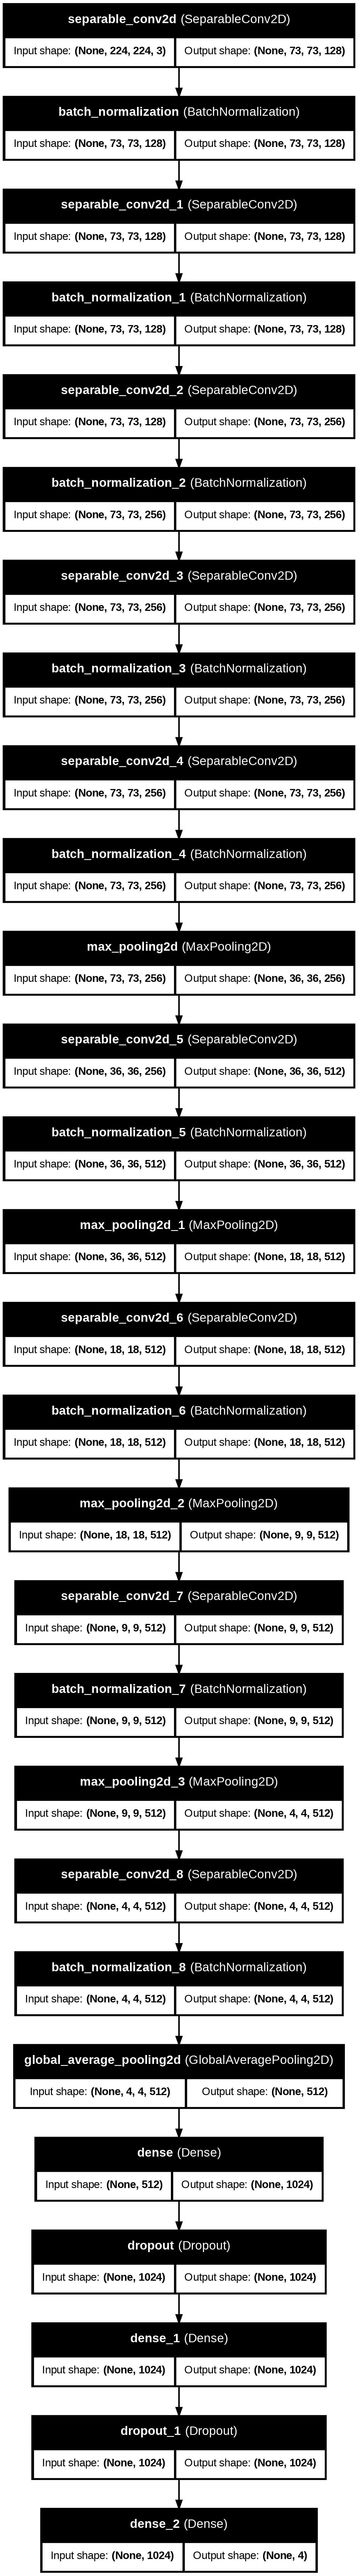

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Define callbacks including EarlyStopping
callbacks = [
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  # Added EarlyStopping
]

history = model.fit(train, epochs=50, validation_data=val, verbose=1,callbacks=callbacks)

Epoch 1/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 83s 69ms/step - accuracy: 0.3058 - loss: 3.0746 - precision: 0.4695 - recall: 0.0045 - val_accuracy: 0.4513 - val_loss: 2.9234 - val_precision: 0.5870 - val_recall: 0.1812
Epoch 2/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 52s 52ms/step - accuracy: 0.5434 - loss: 2.7780 - precision: 0.7592 - recall: 0.2232 - val_accuracy: 0.6551 - val_loss: 2.4467 - val_precision: 0.7436 - val_recall: 0.5693
Epoch 3/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 52s 52ms/step - accuracy: 0.7600 - loss: 2.3041 - precision: 0.8425 - recall: 0.6487 - val_accuracy: 0.8067 - val_loss: 2.2135 - val_precision: 0.8595 - val_recall: 0.7555
Epoch 4/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.8418 - loss: 2.1157 - precision: 0.8848 - recall: 0.7860 - val_accuracy: 0.9152 - val_loss: 1.9171 - val_precision: 0.9308 - val_recall: 0.8916
Epoch 5/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 50s 51ms/step - accuracy: 0.8765 - loss: 2.0152 - precision: 0.8995 - recall: 0.8466 - val_accuracy: 0.7580 - va

In [ ]:
model.evaluate(test, verbose=1)


374/374 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9956 - loss: 1.4173 - precision: 0.9956 - recall: 0.9956


[1.417689323425293, 0.9963185787200928, 0.9963185787200928, 0.9963185787200928]

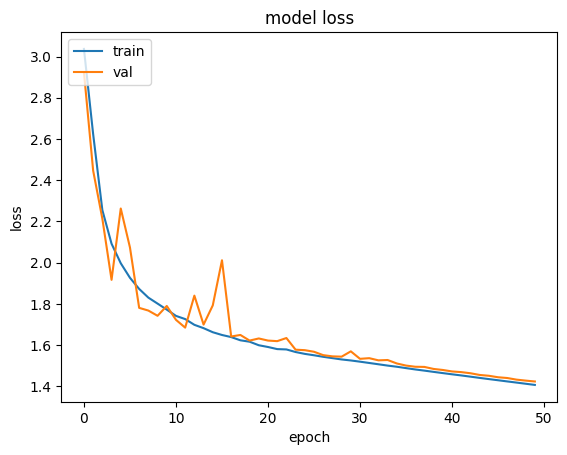

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

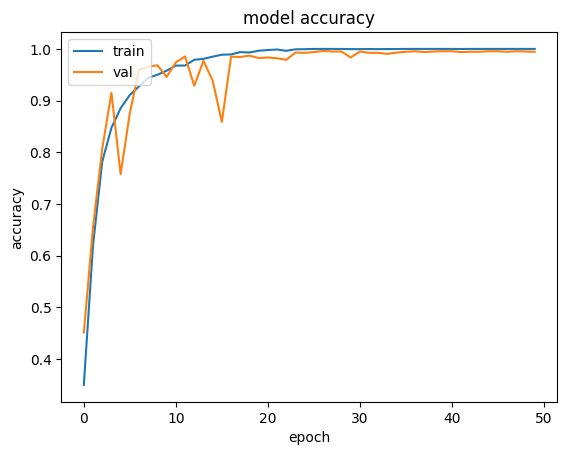

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()